<a href="https://colab.research.google.com/github/hjae0520/class2022Spring/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

In [2]:
import nltk               # text processing, artificial language의 반대개념

> 파일을 불러오는 방식 두 가지

In [3]:
# copy a file from github     모든 텍스트를 string으로 가져오는 것
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"
os.system("curl " + url + " > crime_punishment.txt")

# read a text file in the server
file = open("crime_punishment.txt")
text = file.read().replace("\n", " ")
file.close()

In [4]:
# or copy/pase text here          직접 복붙
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [5]:
# write out a text file      위의 text를 직접 txt파일로 구글 서버에 저장
file = open("tmp.txt", "w")
file.write(text)
file.close()

In [ ]:
text.split()                  # space를 기준으로 쪼갬 = tokenize, 리스트 안에 스트링들로 저장 -> punctuation이 단어들과 붙어있다

In [ ]:
' '.join(text.split())        # ' ' -> space를 넣어서, 위의 스플릿을 다시 합침, ' '없으면 공백없이 그냥 합쳐짐

In [ ]:
from nltk.tokenize import word_tokenize       
nltk.download('punkt')                      # punctuation까지 tokenize
words = word_tokenize(text)
words

In [ ]:
from nltk.tokenize import RegexpTokenizer         # punctuation을 제거 -> 이것을 활용할 것
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)
words

### Normalization  
**Stemming** 어간 추출 대충의 패턴 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)

**Lemmatization** 표제어(기본 사전형) 추출. 어간을 추출해 원형으로 복구


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer       # 존재하는 단어를 기반
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword (관사 대명사 X)

In [18]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
print(words)
words = [w for w in words if not w in stopwords.words('english')]
print(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['I', 'am', 'Jhon', 'from', 'America', 'and', 'would', 'like', 'to', 'go', 'to', 'Starbuck']
['I', 'Jhon', 'America', 'would', 'like', 'go', 'Starbuck']


### Collocation, Concordance (연어)

In [24]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
nltk.Text(words).collocations()  # default: (num=20, window_size=2)

In [ ]:
nltk.Text(words).concordance('Emma', 79, 10)

In [ ]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])     # x축은 전체 단어

In [ ]:
# Distributional similarity:                      # 분포상 유사성 -> emma와 같이 등장하는 단어들, context는 양쪽 단어
# find other words which appear in the same contexts as the specified word; 
# list most similar words first.
nltk.Text(words).similar("Emma")

In [ ]:
# Find contexts where the specified words appear; list most frequent common contexts first.    _ 자리에서 Emma와 she가 같이 등장할 가능성이 높다
nltk.Text(words).common_contexts(["Emma", "she"])

### Frequency distribution, Frequency plot (어떤 단어가 많이 사용되었는가)

In [ ]:
fd = nltk.FreqDist(words).most_common(20) #가장 많이 등장한 단어 20개
fd

In [ ]:
nltk.Text(words).plot(20)   # plotting

### Dictionary

In [ ]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]


In [ ]:
len(nltk.corpus.words.words('en')) #총 단어의 개수

### Extract information (pos tag, named entity)


#### **POS tag list**:     (part of speech, 품사)

CC	coordinating conjunction \
CD	cardinal digit \
DT	determiner \
EX	existential there (like: "there is" ... think of it like "there exists") \
FW	foreign word \
IN	preposition/subordinating conjunction \
JJ	adjective	'big' \
JJR	adjective, comparative	'bigger' \
JJS	adjective, superlative	'biggest' \
LS	list marker	1) \
MD	modal	could, will \
NN	noun, singular 'desk' \
NNS	noun plural	'desks' \
NNP	proper noun, singular	'Harrison' \
NNPS	proper noun, plural	'Americans' \
PDT	predeterminer	'all the kids' \
POS	possessive ending	parent's \
PRP	personal pronoun	I, he, she \
PRP\$	possessive pronoun	my, his, hers \
RB	adverb	very, silently, \
RBR	adverb, comparative	better \
RBS	adverb, superlative	best \
RP	particle	give up \
TO	to	go 'to' the store. \
UH	interjection	errrrrrrrm \
VB	verb, base form	take \
VBD	verb, past tense	took \
VBG	verb, gerund/present participle	taking \
VBN	verb, past participle	taken \
VBP	verb, sing. present, non-3d	take \
VBZ	verb, 3rd person sing. present	takes \
WDT	wh-determiner	which \
WP	wh-pronoun	who, what \
WP\$	possessive wh-pronoun	whose \
WRB	wh-abverb	where, when \

In [21]:
import nltk

In [13]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [16]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)
pos

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('am', 'VBP'),
 ('Jhon', 'RB'),
 ('from', 'IN'),
 ('America', 'NNP'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('Starbuck', 'NNP')]

In [ ]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

### Wordcloud

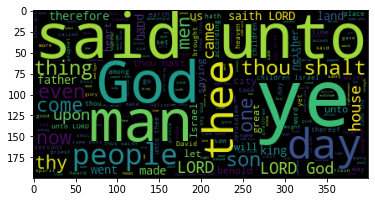

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

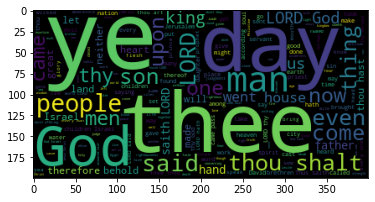

In [26]:
stopwords = set(STOPWORDS) 
stopwords.add('unto') # stopwards에 단어를 추가 (해당 단어를 제거하기 위함)
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)

### Regular expression

In [ ]:
import re

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [ ]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])